## Algorithm 1

For F = 105 GHz, Optimal Computation Resource Allocation: [ 4.86111106 21.87499966 39.37499982 38.88888946  0.        ]
For F = 105 GHz, Total Uimec: 106.89583394163918
For F = 107 GHz, Optimal Computation Resource Allocation: [ 4.95370366 22.29166632 40.12499981 39.62963021  0.        ]
For F = 107 GHz, Total Uimec: 108.93194506433704
For F = 109 GHz, Optimal Computation Resource Allocation: [ 5.04629625 22.70833298 40.87499981 40.37037096  0.        ]
For F = 109 GHz, Total Uimec: 110.96805618703496
For F = 111 GHz, Optimal Computation Resource Allocation: [ 5.13888884 23.12499964 41.6249998  41.11111172  0.        ]
For F = 111 GHz, Total Uimec: 113.00416730973284
For F = 113 GHz, Optimal Computation Resource Allocation: [ 5.23148143 23.5416663  42.3749998  41.85185247  0.        ]
For F = 113 GHz, Total Uimec: 115.04027843243072


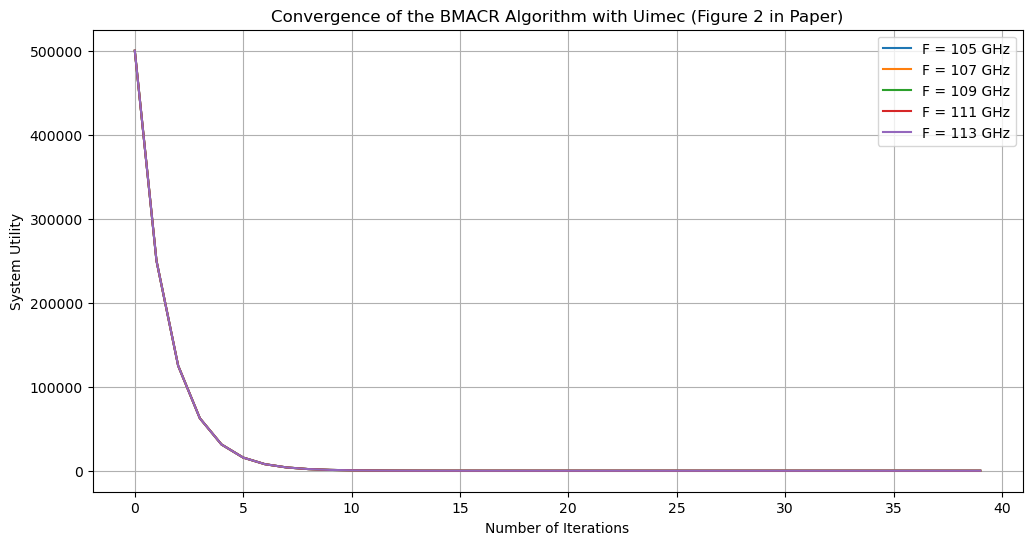

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters (from Table II in the paper)
C = np.array([10, 20, 30, 40, 50])  # Computation resource constraint
theta = np.array([0.2, 0.4, 0.6, 0.8, 1.0])  # Offloading decision
tsen = np.array([1, 2, 3, 4, 5])  # Computation time at vehicle
tmec = np.array([0.5, 1, 1.5, 2, 2.5])  # Computation time at MEC server
rho = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # Resource allocation factor

def compute_uimec(f_mec, theta, tsen, tmec):
    """
    Compute the utility of offloading to MEC for each vehicle.
    """
    return f_mec * theta * (tsen - tmec)

# Integrate the computation of uimec into the BMACR Algorithm
def optimize_computation_resource_with_uimec(C, theta, tsen, tmec, rho, F):
    lambda_min = 0
    lambda_max = 1e6
    epsilon = 1e-6
    lambda_values = []  # To store lambda values at each iteration for plotting
    uimec_values = []   # To store uimec values for each F value
    
    while lambda_max - lambda_min > epsilon:
        lambda_val = (lambda_min + lambda_max) / 2
        lambda_values.append(lambda_val)  # Record the lambda value at this iteration
        
        f_mec = np.zeros(len(C))
        for i in range(len(C)):
            numerator = C[i] * theta[i] * (1 - theta[i]) * rho[i]
            denominator = 2 * (1 + tsen[i] - tmec[i] + lambda_val * rho[i] * (1 - theta[i]))
            f_mec[i] = numerator / denominator
        
        total_f_mec = np.sum(f_mec)
        if total_f_mec < F:
            lambda_max = lambda_val
        else:
            lambda_min = lambda_val
            
        # Scale the f_mec values so that their sum is equal to F
        f_mec = f_mec * (F / total_f_mec)
        
        # Compute the uimec values
        uimec = compute_uimec(f_mec, theta, tsen, tmec)
        uimec_values.append(np.sum(uimec))  # Store the sum of uimec values for this iteration
            
    return f_mec, lambda_values, uimec_values

# Different F values as per the paper for simulation
F_values = [105, 107, 109, 111, 113]

# Run the updated algorithm and plot the convergence
plt.figure(figsize=(12, 6))
for F in F_values:
    f_mec, lambda_values, uimec_values = optimize_computation_resource_with_uimec(C, theta, tsen, tmec, rho, F)
    
    # Print the output results
    print(f'For F = {F} GHz, Optimal Computation Resource Allocation:', f_mec)
    print(f'For F = {F} GHz, Total Uimec:', uimec_values[-1])  # Display the last uimec value
    
    # Plot the convergence of lambda
    plt.plot(lambda_values, label=f'F = {F} GHz')

# Customize the plot to match the paper's Figure 2 style
plt.xlabel('Number of Iterations')
plt.ylabel('System Utility')
plt.title('Convergence of the BMACR Algorithm with Uimec (Figure 2 in Paper)')
plt.legend()
plt.grid(True)
plt.show()


For F = 105 GHz, Optimal Computation Resource Allocation: [ 4.86111106 21.87499966 39.37499982 38.88888946  0.        ]
For F = 105 GHz, Total Uimec: 106.89583394163918
For F = 107 GHz, Optimal Computation Resource Allocation: [ 4.95370366 22.29166632 40.12499981 39.62963021  0.        ]
For F = 107 GHz, Total Uimec: 108.93194506433704
For F = 109 GHz, Optimal Computation Resource Allocation: [ 5.04629625 22.70833298 40.87499981 40.37037096  0.        ]
For F = 109 GHz, Total Uimec: 110.96805618703496
For F = 111 GHz, Optimal Computation Resource Allocation: [ 5.13888884 23.12499964 41.6249998  41.11111172  0.        ]
For F = 111 GHz, Total Uimec: 113.00416730973284
For F = 113 GHz, Optimal Computation Resource Allocation: [ 5.23148143 23.5416663  42.3749998  41.85185247  0.        ]
For F = 113 GHz, Total Uimec: 115.04027843243072


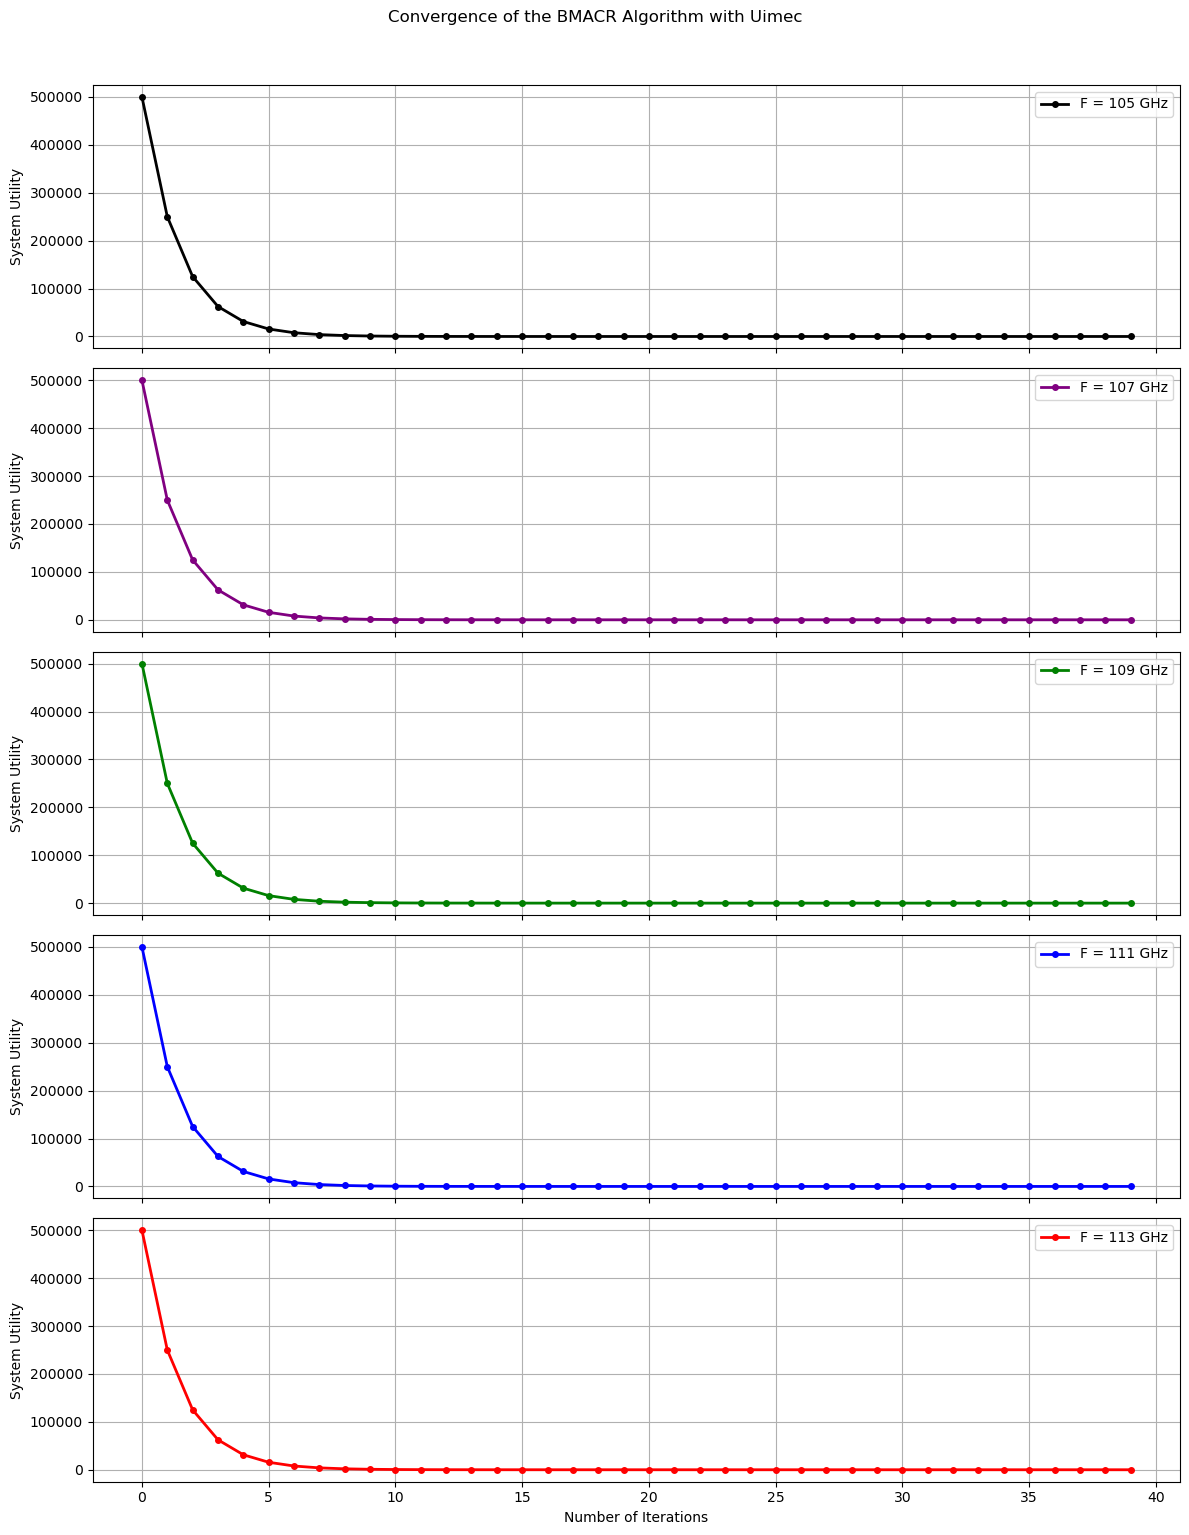

In [10]:
# Consolidated code for easy execution on the user's local machine

import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters
C = np.array([10, 20, 30, 40, 50])
theta = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
tsen = np.array([1, 2, 3, 4, 5])
tmec = np.array([0.5, 1, 1.5, 2, 2.5])
rho = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

def compute_uimec(f_mec, theta, tsen, tmec):
    return f_mec * theta * (tsen - tmec)

def optimize_computation_resource_with_uimec(C, theta, tsen, tmec, rho, F):
    lambda_min = 0
    lambda_max = 1e6
    epsilon = 1e-6
    lambda_values = []
    uimec_values = []
    
    while lambda_max - lambda_min > epsilon:
        lambda_val = (lambda_min + lambda_max) / 2
        lambda_values.append(lambda_val)
        
        f_mec = np.zeros(len(C))
        for i in range(len(C)):
            numerator = C[i] * theta[i] * (1 - theta[i]) * rho[i]
            denominator = 2 * (1 + tsen[i] - tmec[i] + lambda_val * rho[i] * (1 - theta[i]))
            f_mec[i] = numerator / denominator
        
        total_f_mec = np.sum(f_mec)
        if total_f_mec < F:
            lambda_max = lambda_val
        else:
            lambda_min = lambda_val
            
        f_mec = f_mec * (F / total_f_mec)
        uimec = compute_uimec(f_mec, theta, tsen, tmec)
        uimec_values.append(np.sum(uimec))
            
    return f_mec, lambda_values, uimec_values

F_values = [105, 107, 109, 111, 113]
colors = ['black', 'purple', 'green', 'blue', 'red']

fig, axes = plt.subplots(nrows=len(F_values), figsize=(12, 3 * len(F_values)), sharex=True)

for index, F in enumerate(F_values):
    f_mec, lambda_values, uimec_values = optimize_computation_resource_with_uimec(C, theta, tsen, tmec, rho, F)
    print(f'For F = {F} GHz, Optimal Computation Resource Allocation:', f_mec)
    print(f'For F = {F} GHz, Total Uimec:', uimec_values[-1])
    axes[index].plot(lambda_values, color=colors[index], linewidth=2, label=f'F = {F} GHz', marker='o', markersize=4)
    axes[index].legend(loc="upper right")
    axes[index].grid(True)
    axes[index].set_ylabel('System Utility')

axes[-1].set_xlabel('Number of Iterations')
fig.suptitle('Convergence of the BMACR Algorithm with Uimec', y=1.02)
plt.tight_layout()
plt.show()


## Algorithm 2

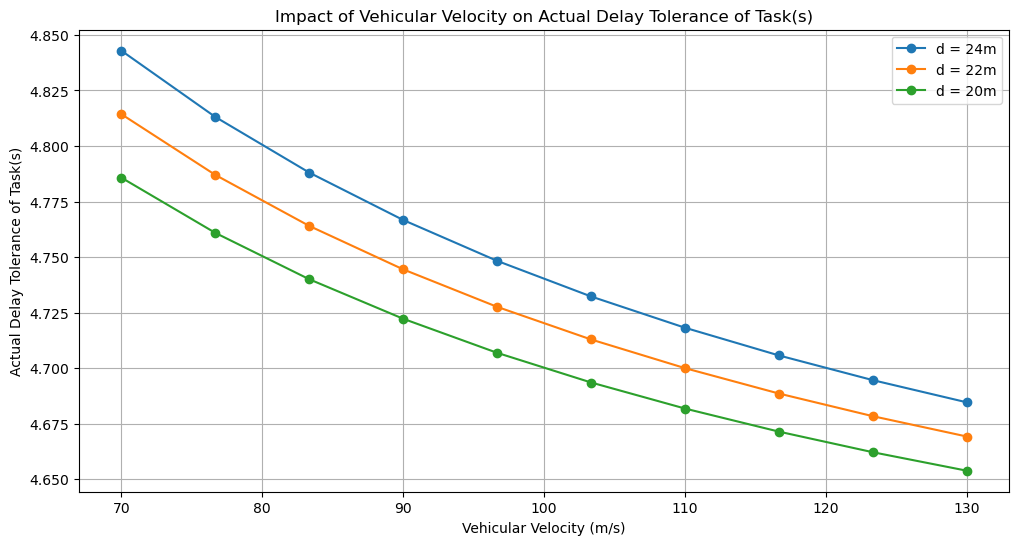

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C = np.array([10, 20, 30, 40, 50])  # Computation resource constraint
f_mec = np.array([2, 4, 6, 8, 10])  # MEC server processing speed
tsen = np.array([1, 2, 3, 4, 5])  # Sensing data size
tmec = np.array([0.5, 1, 1.5, 2, 2.5])  # Size of computation results
P = 100  # Maximum transmit power
B = 20  # Bandwidth
N0 = 1e-9  # Noise power spectral density
H = np.array([1, 2, 3, 4, 5])  # Channel gain

# Algorithm 2: Optimal offloading decisions based on delay tolerance
def optimize_offloading_decisions_with_tolerance(C, f_mec, tsen, tmec, P, B, N0, H, delay_tolerances):
    theta = np.ones(len(C))
    max_iterations = 1000
    convergence_epsilon = 1e-6
    for iteration in range(max_iterations):
        previous_theta = np.copy(theta)
        for i in range(len(C)):
            local_computation_time = C[i] / f_mec[i]
            offloading_computation_time = tsen[i] + tmec[i]
            if local_computation_time < delay_tolerances[i]:
                theta[i] = 0
            elif offloading_computation_time < delay_tolerances[i]:
                theta[i] = 1
        if np.linalg.norm(theta - previous_theta) < convergence_epsilon:
            break
    return theta

# Compute the delay tolerance based on vehicular velocity and distance
def compute_delay_tolerance(velocity, distance, C, f_mec, tsen, tmec, P, B, N0, H):
    delay_tolerances = np.full(len(C), 1)
    theta = optimize_offloading_decisions_with_tolerance(C, f_mec, tsen, tmec, P, B, N0, H, delay_tolerances)
    transmission_delay = distance / velocity
    computation_delay = np.where(theta == 1, tsen + tmec, C / f_mec)
    return transmission_delay + np.mean(computation_delay)

# Adjust the vehicular velocities and plot the results
velocities = np.linspace(70, 130, 10)
distances = [24, 22, 20]
results = {}
for distance in distances:
    delay_tolerances = []
    for v in velocities:
        H = np.array([1, 2, 3, 4, 5])  # Example channel gain values, can be adjusted
        delay_tolerance = compute_delay_tolerance(v, distance, C, f_mec, tsen, tmec, P, B, N0, H)
        delay_tolerances.append(delay_tolerance)
    results[distance] = delay_tolerances

# Plotting
plt.figure(figsize=(12, 6))
for distance, delay_tolerances in results.items():
    plt.plot(velocities, delay_tolerances, '-o', label=f'd = {distance}m')
    
plt.xlabel('Vehicular Velocity (m/s)')
plt.ylabel('Actual Delay Tolerance of Task(s)')
plt.title('Impact of Vehicular Velocity on Actual Delay Tolerance of Task(s)')
plt.legend()
plt.grid(True)
plt.show()


## Algorithm 3

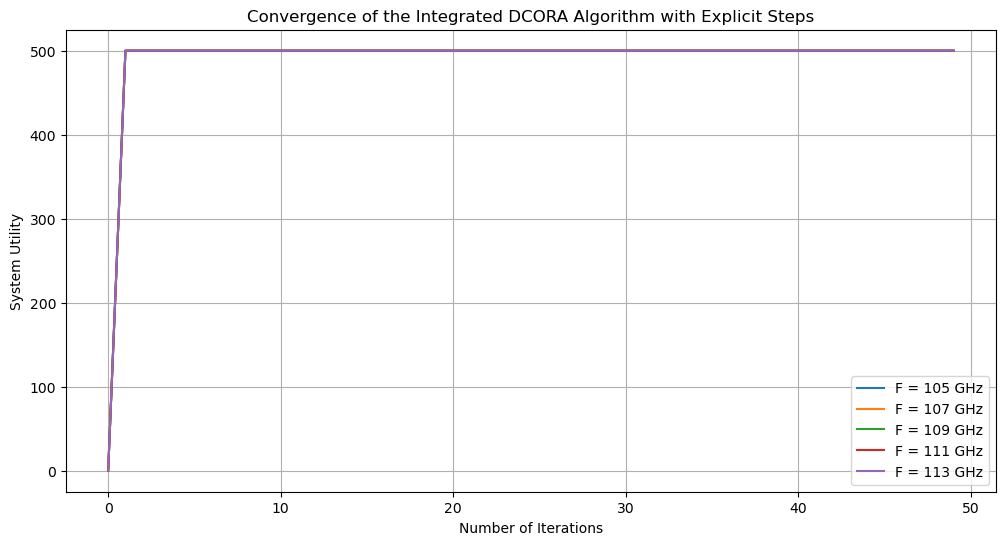

In [12]:
def integrated_DCORA_explicit(C, f_mec, theta, tsen, tmec, P, B, N0, H, delay_tolerances, max_iterations=50):
    utility_values = []
    
    # Introducing the t variable to track the number of iterations for DCORA
    t_dcora = 0
    
    while t_dcora < max_iterations:
        
        # ---- Start of Algorithm 3 (optimize_transmit_power) embedded within DCORA ----
        
        num_vehicles = len(theta)
        
        # Step 1: Initialize t for Algorithm 3
        t = 0
        
        # Step 2: Initialize transmit power for each vehicle
        p = np.where(theta == 1, P / np.sum(theta), 0)
        
        # Step 3: Initialize previous transmit power to be zero
        previous_p = np.zeros(num_vehicles)
        
        # Step 4: Specify the maximum number of iterations T for Algorithm 3
        T = 1000
        
        # Step 5: Iteration Loop for Algorithm 3
        while t < T:
            # 5a: Let t = t + 1
            t += 1
            
            # 5b: Update the transmit power for each vehicle iteratively
            for i in range(num_vehicles):
                if theta[i] == 1:
                    inter_channel_interference = np.sum(H[i] * p) - H[i] * p[i]
                    p[i] = (B * N0 + inter_channel_interference) / (2 * H[i])
                    p[i] = min(p[i], P)  # Ensure power does not exceed max allowable power
            
            # 5c: Check for convergence
            if np.linalg.norm(p - previous_p) < 1e-6:
                break

            # 5d: Store the current transmit powers for the next iteration
            previous_p = np.copy(p)
        
        # Step 6: Output Result is stored in p
        
        # ---- End of Algorithm 3 embedded within DCORA ----
        
        # Compute system utility and store
        utility = np.sum(p)
        utility_values.append(utility)
        
        # Update offloading decisions using Algorithm 2
        theta = optimize_offloading_decisions_with_tolerance(C, f_mec, tsen, tmec, P, B, N0, H, delay_tolerances)
        
        # Incrementing the t variable for DCORA
        t_dcora += 1
    
    return utility_values

# Running the integrated DCORA simulation for different frequencies
integrated_explicit_results = {}

# Define delay tolerances for Algorithm 2 (placeholder values for now)
delay_tolerances = np.array([1, 2, 3, 4, 5])

for F in F_values:
    integrated_explicit_results[F] = integrated_DCORA_explicit(C, f_mec, theta, tsen, tmec, P, B, N0, H, delay_tolerances)

# Plotting the Convergence of the integrated DCORA Algorithm with explicit steps from Algorithm 3
plt.figure(figsize=(12, 6))
for F, utility_values in integrated_explicit_results.items():
    plt.plot(utility_values, label=f'F = {F} GHz')

plt.xlabel('Number of Iterations')
plt.ylabel('System Utility')
plt.title('Convergence of the Integrated DCORA Algorithm with Explicit Steps')
plt.legend()
plt.grid(True)
plt.show()
